#### Problem Statement

You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:

* Remove any data that is not relevant to the patient’s ALS condition.
* Apply a standard scalar to the data.
* Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
* Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
* Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
* Fit a PCA transformation with two features to the scaled data.
* Make a scatterplot the PCA transformed data coloring each point by its cluster value.
* Summarize your results and make a conclusion.

I will work on each of these bullet points one by one. Before starting on these bullet points the important step is to include the required libaries and read the data into a dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("als_data.csv")

In [3]:
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


* #### Remove Any data that is not relevant to patient's ALS confition

When we are dealing with high dimensional datasets, we can run into issues with clustering methods. Feature selection is a well-known technique for supervised learning but a lot less for unsupervised learning (like clustering) methods. For that reason I am going to pick the columns based on gut feeling at this moment.

I think subject ID and ID are the columns which are not relevant, I will get rid of those and keep the rest.

In [4]:
df.drop(columns=['SubjectID','ID'], inplace = True)

In [5]:
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


* #### Apply a standard scalar to the data

I have to apply the standard scaler to standardize the data because it helps to improve the performance and convergence of the model. I am going to use a package to perform this operation but the formula for standar scaler is z = (x - u) / s. where u is a mean and S is a standard deviation.

I need to import standardscaler package frm sklearn.

In [6]:
from sklearn.preprocessing import StandardScaler

Performing the standard scaler on our df now. We will get a scaled dataframe post this operation.

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

* #### Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

For this, I will need additional packaged from sklearn. Let me import those

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Below is the code that will run through 2 to 10 to come up with the number of clusters and the silhouette scores for each value of k i.e. the number of clusters

In [9]:
slht_scores = []
for n_clusters in range(2, 10):  
    km = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = km.fit_predict(scaled_df)
    slht_scores.append(silhouette_score(scaled_df, clusters))

The next thing is to plot the silhouette scores for each value of k.

To plot I need to import matplotlib, let me do that.

In [10]:
import matplotlib.pyplot as plt

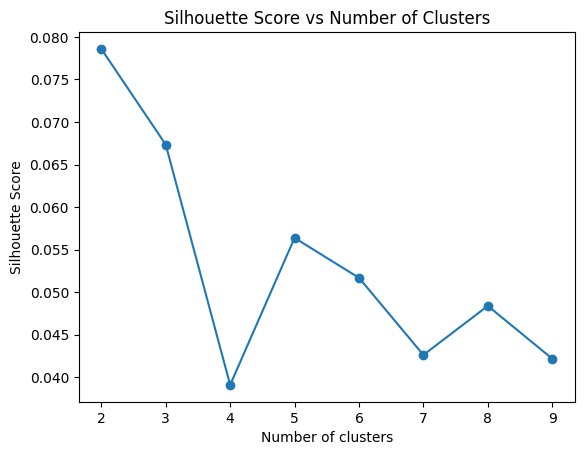

In [11]:
plt.plot(range(2, 10), slht_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


It is evident from the plot above that the K = 2 has maximum Silhouette Score.

* #### Fit a K-means model with the optimal number of clusters

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

* #### Fit a PCA transformation with two features to the scaled data.

For this I need to import PCA module from sklearn.

In [13]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

* #### Make a scatterplot of the PCA transformed data coloring each point by its cluster value

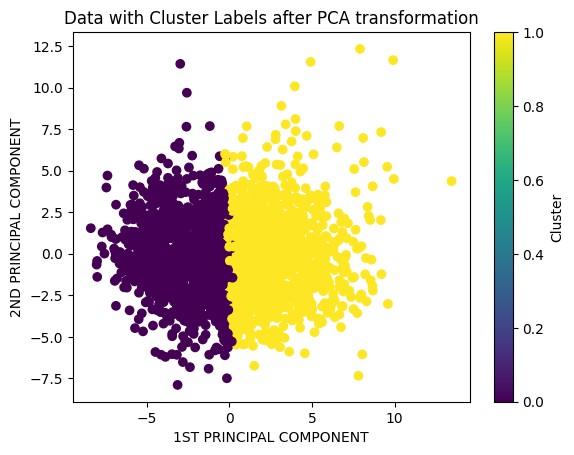

In [17]:
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('1ST PRINCIPAL COMPONENT')
plt.ylabel('2ND PRINCIPAL COMPONENT')
plt.title('Data with Cluster Labels after PCA transformation')
plt.colorbar(label='Cluster')
plt.show()

* #### Analyze the cluster distribution and characteristics to draw conclusions about ALS patient data

*  Per the Silhouette Score, K = 2 is the optimized number of clusters.
*  K = 2 has score closed to 0.08
*  Based on that the scatter plot is generated and it has plotted all the data points into two clusters.
*  Looking at the scatter plot, with K = 2, it seems that removing outliers from the data wouldn't have impacted anything.
*  The distinction in the two clusters seems to be based on 1st Principal Component
*  All the data points with 1st Principal Component <= 0 is one cluster
*  All the remaining data points i.e. 1st Principal Component > 0 is the second cluster.